# Part16 - Preparing Numeric Data
http://hamelg.blogspot.com/2015/11/python-for-data-analysis-part-16.html

### Standardizing = centering + scaling

centering = subtract the mean value from each data point

scaling(also called normalization) = Divide the centered data by the standard deviation, for each data point

Standardization refers to the process of subtracting the mean and dividing by the standard deviation. 

http://statisticsbyjim.com/glossary/standardization/
In statistics, standardization is the process of putting different variables on the same scale. This process allows you to compare scores between different types of variables. Typically, to standardize variables, you calculate the mean and standard deviation for a variable. Then, for each observed value of the variable, you subtract the mean and divide by the standard deviation.

This process produces standard scores that represent the number of standard deviations above or below the mean that a specific observation falls. For instance, a standardized value of 2 indicates that the observation falls 2 standard deviations above the mean. This interpretation is true regardless of the type of variable that you standardize.

Numeric variables are often on different scales and cover different ranges, so they can't be easily compared. What's more, variables with large values can dominate those with smaller values when using certain modeling techniques. Centering and scaling is a common preprocessing task that puts numeric variables on a common scale so no single variable will dominate the others.

In [32]:
import pandas as pd
import numpy as np
mtcars = pd.read_csv("https://vincentarelbundock.github.io/Rdatasets/csv/datasets/mtcars.csv", index_col=0)
print(mtcars.head())
print(mtcars.describe())

                    mpg  cyl   disp   hp  drat     wt   qsec  vs  am  gear  \
Mazda RX4          21.0    6  160.0  110  3.90  2.620  16.46   0   1     4   
Mazda RX4 Wag      21.0    6  160.0  110  3.90  2.875  17.02   0   1     4   
Datsun 710         22.8    4  108.0   93  3.85  2.320  18.61   1   1     4   
Hornet 4 Drive     21.4    6  258.0  110  3.08  3.215  19.44   1   0     3   
Hornet Sportabout  18.7    8  360.0  175  3.15  3.440  17.02   0   0     3   

                   carb  
Mazda RX4             4  
Mazda RX4 Wag         4  
Datsun 710            1  
Hornet 4 Drive        1  
Hornet Sportabout     2  
             mpg        cyl        disp          hp       drat         wt  \
count  32.000000  32.000000   32.000000   32.000000  32.000000  32.000000   
mean   20.090625   6.187500  230.721875  146.687500   3.596563   3.217250   
std     6.026948   1.785922  123.938694   68.562868   0.534679   0.978457   
min    10.400000   4.000000   71.100000   52.000000   2.760000   1.

In [16]:
# Calculate mean of each column
colmeans = mtcars.sum()/mtcars.shape[0]
colmeans

mpg      20.090625
cyl       6.187500
disp    230.721875
hp      146.687500
drat      3.596563
wt        3.217250
qsec     17.848750
vs        0.437500
am        0.406250
gear      3.687500
carb      2.812500
dtype: float64

In [18]:
# Centering
centered_mtcars = mtcars - colmeans
centered_mtcars.describe()

# Notice that all mean are close to 0

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,3.200000e+01,32.000000,3.200000e+01,32.000000,3.200000e+01,3.200000e+01,3.200000e+01,32.000000,32.000000,32.000000,32.0000
mean,3.996803e-15,0.000000,-3.863576e-14,0.000000,-5.967449e-16,4.787837e-16,-2.609024e-15,0.000000,0.000000,0.000000,0.0000
std,6.026948e+00,1.785922,1.239387e+02,68.562868,5.346787e-01,9.784574e-01,1.786943e+00,0.504016,0.498991,0.737804,1.6152
min,-9.690625e+00,-2.187500,-1.596219e+02,-94.687500,-8.365625e-01,-1.704250e+00,-3.348750e+00,-0.437500,-0.406250,-0.687500,-1.8125
25%,-4.665625e+00,-2.187500,-1.098969e+02,-50.187500,-5.165625e-01,-6.360000e-01,-9.562500e-01,-0.437500,-0.406250,-0.687500,-0.8125
50%,-8.906250e-01,-0.187500,-3.442188e+01,-23.687500,9.843750e-02,1.077500e-01,-1.387500e-01,-0.437500,-0.406250,0.312500,-0.8125
75%,2.709375e+00,1.812500,9.527812e+01,33.312500,3.234375e-01,3.927500e-01,1.051250e+00,0.562500,0.593750,0.312500,1.1875
max,1.380938e+01,1.812500,2.412781e+02,188.312500,1.333437e+00,2.206750e+00,5.051250e+00,0.562500,0.593750,1.312500,5.1875


In [21]:
# Get column standard deviations
columns_std = mtcars.std(axis=0)
centered_and_scaled = centered_mtcars/columns_std
print(centered_and_scaled.describe())
# The mean is almost 0 and the standard deviation is almost 1.

                mpg           cyl          disp            hp          drat  \
count  3.200000e+01  3.200000e+01  3.200000e+01  3.200000e+01  3.200000e+01   
mean   6.487866e-16 -1.474515e-17 -3.061787e-16  1.040834e-17 -1.108055e-15   
std    1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
min   -1.607883e+00 -1.224858e+00 -1.287910e+00 -1.381032e+00 -1.564608e+00   
25%   -7.741273e-01 -1.224858e+00 -8.867035e-01 -7.319924e-01 -9.661175e-01   
50%   -1.477738e-01 -1.049878e-01 -2.777331e-01 -3.454858e-01  1.841059e-01   
75%    4.495434e-01  1.014882e+00  7.687521e-01  4.858679e-01  6.049193e-01   
max    2.291272e+00  1.014882e+00  1.946754e+00  2.746567e+00  2.493904e+00   

                 wt          qsec            vs            am          gear  \
count  3.200000e+01  3.200000e+01  3.200000e+01  3.200000e+01  3.200000e+01   
mean   4.956566e-16 -1.450337e-15  6.938894e-18  4.510281e-17 -3.469447e-18   
std    1.000000e+00  1.000000e+00  1.000000e+00  1.

In [30]:
# Using built-in function to perform standardization
from sklearn import preprocessing
scaled_data = preprocessing.scale(mtcars)

# preprocessing.scale returns a numpy array. We need to put it back into a pandas dataframe
mtcars_scaled = pd.DataFrame(scaled_data, index = mtcars.index, columns = mtcars.columns)
print(mtcars_scaled.describe())

                mpg           cyl          disp         hp          drat  \
count  3.200000e+01  3.200000e+01  3.200000e+01  32.000000  3.200000e+01   
mean   6.895526e-17  3.642919e-17 -1.058181e-16   0.000000 -3.003240e-16   
std    1.016001e+00  1.016001e+00  1.016001e+00   1.016001  1.016001e+00   
min   -1.633610e+00 -1.244457e+00 -1.308518e+00  -1.403130 -1.589643e+00   
25%   -7.865141e-01 -1.244457e+00 -9.008917e-01  -0.743705 -9.815764e-01   
50%   -1.501383e-01 -1.066677e-01 -2.821771e-01  -0.351014  1.870518e-01   
75%    4.567366e-01  1.031121e+00  7.810529e-01   0.493642  6.145986e-01   
max    2.327934e+00  1.031121e+00  1.977904e+00   2.790515  2.533809e+00   

                 wt          qsec            vs            am          gear  \
count  3.200000e+01  3.200000e+01  3.200000e+01  3.200000e+01  3.200000e+01   
mean   5.486063e-17  5.436190e-16  6.938894e-18 -1.387779e-17 -6.938894e-18   
std    1.016001e+00  1.016001e+00  1.016001e+00  1.016001e+00  1.016001e+00   

In [27]:
mtcars.index

Index(['Mazda RX4', 'Mazda RX4 Wag', 'Datsun 710', 'Hornet 4 Drive',
       'Hornet Sportabout', 'Valiant', 'Duster 360', 'Merc 240D', 'Merc 230',
       'Merc 280', 'Merc 280C', 'Merc 450SE', 'Merc 450SL', 'Merc 450SLC',
       'Cadillac Fleetwood', 'Lincoln Continental', 'Chrysler Imperial',
       'Fiat 128', 'Honda Civic', 'Toyota Corolla', 'Toyota Corona',
       'Dodge Challenger', 'AMC Javelin', 'Camaro Z28', 'Pontiac Firebird',
       'Fiat X1-9', 'Porsche 914-2', 'Lotus Europa', 'Ford Pantera L',
       'Ferrari Dino', 'Maserati Bora', 'Volvo 142E'],
      dtype='object')

## Dealing With Skewed Data
The distribution of data--its overall shape and how it is spread out--can have a significant impact on analysis and modeling. Data that is roughly evenly spread around the mean value--known as normally distributed data--tends to be well-behaved. On the other hand, some data sets exhibit significant skewness or asymmetry

In [34]:
%matplotlib inline

array([[<matplotlib.axes._subplots.AxesSubplot object at 0xa5ccbb2c>]],
      dtype=object)

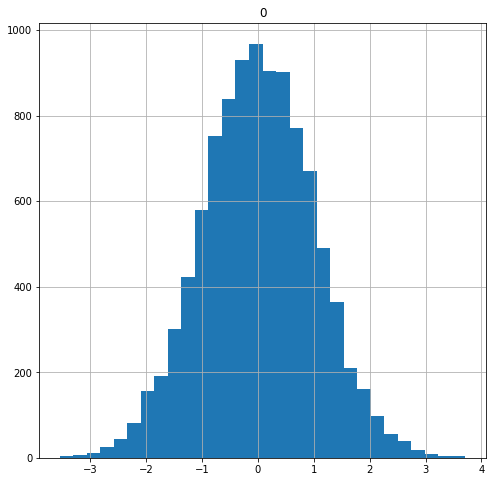

In [35]:
# Generate a normal distribution
normal_dist = np.random.normal(size=10000)
normal_distDF = pd.DataFrame(normal_dist) # convert to pandas dataframe
normal_distDF.hist(figsize=(8,8), bins=30)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0xa5b82b0c>]],
      dtype=object)

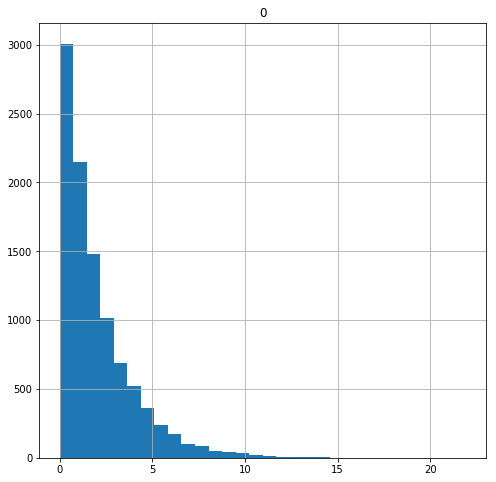

In [37]:
# Generate skewed data, using exponential function
skewed = np.random.exponential(scale=2, size=10000)
skewed_DF = pd.DataFrame(skewed)
skewed_DF.hist(figsize=(8,8), bins=30)

When you have a skewed distribution like the one above, the extreme values in the long tail can have a disproportionately large influence on whatever test you perform or models you build. Reducing skew may improve your results. Taking the square root of each data point or taking the natural logarithm of each data point are two simple transformations that can reduce skew.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0xa56b09ac>]],
      dtype=object)

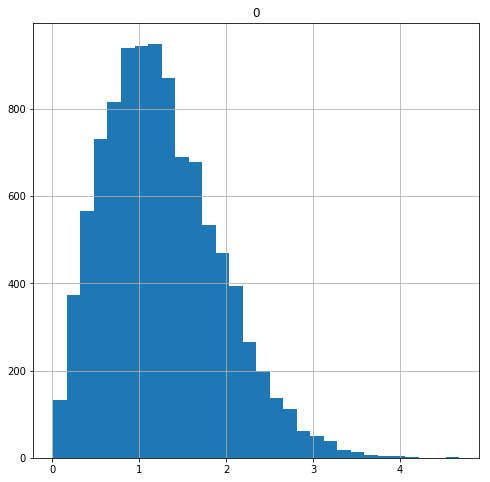

In [39]:
# square root transformation
sqrt_transformed = skewed_DF.apply(np.sqrt)
sqrt_transformed.hist(figsize=(8,8), bins=30)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0xa59d04ec>]],
      dtype=object)

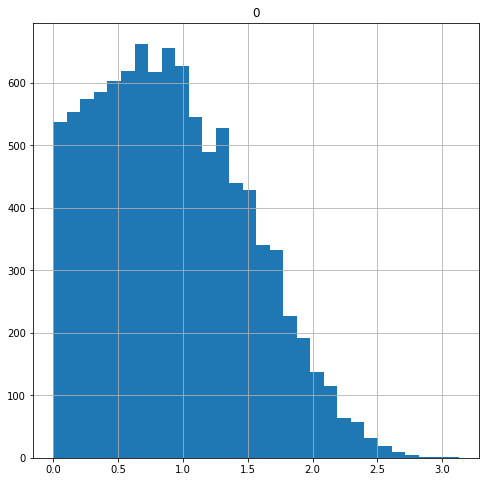

In [40]:
# log transformation
log_trans = (skewed_DF+1).apply(np.log)
log_trans.hist(figsize=(8,8), bins=30)

Note: Adding 1 before taking the log ensures we don't end up with negative values. Also note that neither of these transformations work on data containing negative values. To make them work on data with negative values add a constant to each value that is large enough to make all the data greater than or equal to 1 (such as adding the absolute value of the smallest number +1)
Both the sqrt() and log() transforms reduced the skew of the data. It's still not quite normally distributed, but the amount of extreme data in the tails has been reduced to the point where we might not be so worried about it having a large influence on our results.

### Highly Correlated Variables
Ideally, independent variables are independent of each other, in a regression setup. Each variable represents a unique feature. But rarely in real life scenarios does it happen. Independent variables often exhibit some amount of correlation. Correlation interfers with modelling and inference.

You can check the pairwise correlations between numeric variables using the df.corr() function:

In [45]:
mtcars.iloc[:, 0:6].corr()

,mpg,cyl,disp,hp,drat,wt
mpg,1.000000,-0.852162,-0.847551,-0.776168,0.681172,-0.867659
cyl,-0.852162,1.000000,0.902033,0.832447,-0.699938,0.782496
disp,-0.847551,0.902033,1.000000,0.790949,-0.710214,0.887980
hp,-0.776168,0.832447,0.790949,1.000000,-0.448759,0.658748
drat,0.681172,-0.699938,-0.710214,-0.448759,1.000000,-0.712441
wt,-0.867659,0.782496,0.887980,0.658748,-0.712441,1.000000


A positive correlation implies that when one variable goes up the other tends to go up as well. Negative correlations indicate an inverse relationship: when one variable goes up the other tends to go down. A correlation near zero indicates low correlation while a correlation near -1 or 1 indicates a large negative or positive correlation.

Scatter plot visualizes correlation better than a table.

/home/sindhuvarun/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  


array([[<matplotlib.axes._subplots.AxesSubplot object at 0xa4acfdec>,
      dtype=object)

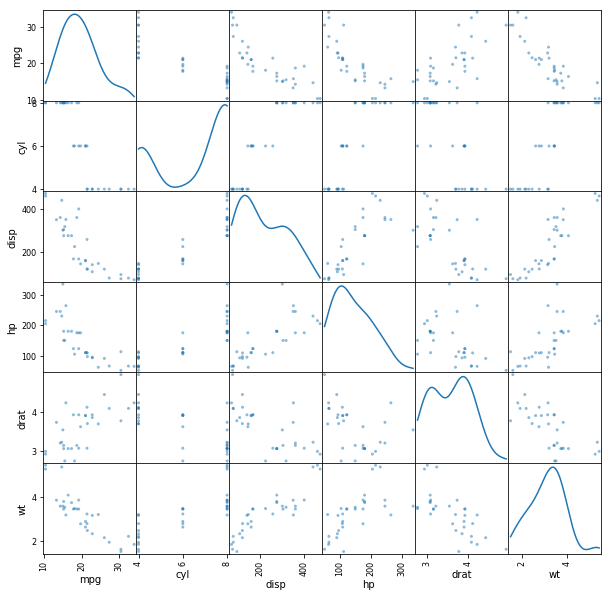

In [48]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix(mtcars.iloc[:,0:6], figsize=(10,10), diagonal='kde')

### Imputing with Sklearn


In [49]:
# Replace missing values with built-in function
from sklearn.preprocessing import Imputer

# The following line sets a few mpg values to None
mtcars["mpg"] = np.where(mtcars["mpg"]>22, None, mtcars["mpg"])

mtcars["mpg"]        # Confirm that missing values were added


Mazda RX4                21
Mazda RX4 Wag            21
Datsun 710             None
Hornet 4 Drive         21.4
Hornet Sportabout      18.7
Valiant                18.1
Duster 360             14.3
Merc 240D              None
Merc 230               None
Merc 280               19.2
Merc 280C              17.8
Merc 450SE             16.4
Merc 450SL             17.3
Merc 450SLC            15.2
Cadillac Fleetwood     10.4
Lincoln Continental    10.4
Chrysler Imperial      14.7
Fiat 128               None
Honda Civic            None
Toyota Corolla         None
Toyota Corona          21.5
Dodge Challenger       15.5
AMC Javelin            15.2
Camaro Z28             13.3
Pontiac Firebird       19.2
Fiat X1-9              None
Porsche 914-2          None
Lotus Europa           None
Ford Pantera L         15.8
Ferrari Dino           19.7
Maserati Bora            15
Volvo 142E             21.4
Name: mpg, dtype: object

In [50]:
imp = Imputer(missing_values='NaN',  # Create imputation model
              strategy='mean',       # Use mean imputation
              axis=0)                # Impute by column

imputed_cars = imp.fit_transform(mtcars)   # Use imputation model to get values

imputed_cars = pd.DataFrame(imputed_cars,  # Remake DataFrame with new values
                           index=mtcars.index,
                           columns = mtcars.columns)

imputed_cars.head(10)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21.000000,6.0,160.0,110.0,3.90,2.620,16.46,0.0,1.0,4.0,4.0
Mazda RX4 Wag,21.000000,6.0,160.0,110.0,3.90,2.875,17.02,0.0,1.0,4.0,4.0
Datsun 710,17.065217,4.0,108.0,93.0,3.85,2.320,18.61,1.0,1.0,4.0,1.0
Hornet 4 Drive,21.400000,6.0,258.0,110.0,3.08,3.215,19.44,1.0,0.0,3.0,1.0
Hornet Sportabout,18.700000,8.0,360.0,175.0,3.15,3.440,17.02,0.0,0.0,3.0,2.0
Valiant,18.100000,6.0,225.0,105.0,2.76,3.460,20.22,1.0,0.0,3.0,1.0
Duster 360,14.300000,8.0,360.0,245.0,3.21,3.570,15.84,0.0,0.0,3.0,4.0
Merc 240D,17.065217,4.0,146.7,62.0,3.69,3.190,20.00,1.0,0.0,4.0,2.0
Merc 230,17.065217,4.0,140.8,95.0,3.92,3.150,22.90,1.0,0.0,4.0,2.0
Merc 280,19.200000,6.0,167.6,123.0,3.92,3.440,18.30,1.0,0.0,4.0,4.0
